# Trends in atmospheric Carbon Dioxide Concentration (30 points)

The carbon dioxide data measured on Mauna Loa in Hawaii constitute the longest record of direct measurements of CO$_2$ in the atmosphere. They were started by C. David Keeling of the Scripps Institution of Oceanography in March of 1958 at a facility of the National Oceanic and Atmospheric Administration [Keeling, 1976]. NOAA started its own CO$_2$ measurements in May of 1974, and they have run in parallel with those made by Scripps since then [Thoning, 1989].

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

Here is information from the header of the data file that we will import:

```
Atmospheric CO2 concentrations (ppm) derived from in situ air measurements                
 at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m    
 
 Since December 2022 sampling has temporarily been relocated to MaunuaKea, Hawaii          
 Latitude 19.8Â°N Longitude 155.5Â°W Elevation 4145m      
                                                                                           
 Source: R. F. Keeling, S. J. Walker, S. C. Piper and A. F. Bollenbacher                   
 Scripps CO2 Program ( http://scrippsco2.ucsd.edu )                                        
 Scripps Institution of Oceanography (SIO)                                                 
 University of California                                                                  
 La Jolla, California USA 92093-0244                                                       
                                                                                           
 Status of data and correspondence:                                                        
                                                                                           
 These data are subject to revision based on recalibration of standard gases. Questions    
 about the data should be directed to Dr. Ralph Keeling (rkeeling@ucsd.edu), Stephen Walker
 (sjwalker@ucsd.edu) and Stephen Piper (scpiper@ucsd.edu), Scripps CO2 Program.            
                                                                                           
 Baseline data in this file through 05-Feb-2023 from archive dated 06-Feb-2023 16:48:44    
                                                                                           
-------------------------------------------------------------------------------------------
                                                                                           
 Please cite as:                                                                           
                                                                                           
 C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and       
 H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and   
 oceans from 1978 to 2000.  I. Global aspects, SIO Reference Series, No. 01-06, Scripps    
 Institution of Oceanography, San Diego, 88 pages, 2001.                                                                                                        
                                                                                           
-------------------------------------------------------------------------------------------
                                                                                           
 The data file below contains 10 columns.  Columns 1-4 give the dates in several redundant 
 formats. Column 5 below gives monthly Mauna Loa CO2 concentrations in micro-mol CO2 per   
 mole (ppm), reported on the 2012 SIO manometric mole fraction scale.  This is the        
 standard version of the data most often sought.  The monthly values have been adjusted    
 to 24:00 hours on the 15th of each month.  Column 6 gives the same data after a seasonal  
 adjustment to remove the quasi-regular seasonal cycle.  The adjustment involves           
 subtracting from the data a 4-harmonic fit with a linear gain factor.  Column 7 is a      
 smoothed version of the data generated from a stiff cubic spline function plus 4-harmonic 
 functions with linear gain.  Column 8 is the same smoothed version with the seasonal      
 cycle removed.  Column 9 is identical to Column 5 except that the missing values from     
 Column 5 have been filled with values from Column 7.  Column 10 is identical to Column 6  
 except missing values have been filled with values from Column 8.  Missing values are     
 denoted by -99.99                                                                         
 Column 11 is the 3-digit sampling station identifier
 ```
 
 We can import that data from 
 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv'
 and specify the columns using the above descriptions.

In [2]:
# Monthly Average Carbon Dioxide Concentration in parts per million (ppm) 
# measured at Mauna Loa Observatory, Hawaii
# source: https://scripps.ucsd.edu/programs/keelingcurve/permissions-and-data-sources/
# https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv
C02_data=pd.read_csv('https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv',
                     header=59,names=['Yr','Mn','Date_Excel','Date','CO2','CO2_season_adjusted',
                                      'CO2_smoothed','CO2_adjusted_smoothed',
                                      'CO2_missing_filled','CO2_adjusted_missing_filled','station'])
C02_data.tail(20)

,Yr,Mn,Date_Excel,Date,CO2,CO2_season_adjusted,CO2_smoothed,CO2_adjusted_smoothed,CO2_missing_filled,CO2_adjusted_missing_filled,station
772,2022,5,44696,2022.3699,420.77,417.37,421.26,417.86,420.77,417.37,MLO
773,2022,6,44727,2022.4548,420.68,418.10,420.60,418.04,420.68,418.10,MLO
774,2022,7,44757,2022.5370,418.68,417.87,418.99,418.22,418.68,417.87,MLO
775,2022,8,44788,2022.6219,416.76,418.31,416.82,418.41,416.76,418.31,MLO
776,2022,9,44819,2022.7068,415.41,418.91,415.09,418.62,415.41,418.91,MLO
777,2022,10,44849,2022.7890,415.31,418.93,415.21,418.82,415.31,418.93,MLO
778,2022,11,44880,2022.8740,417.04,419.31,416.78,419.02,417.04,419.31,MLO
779,2022,12,44910,2022.9562,418.57,419.49,418.31,419.22,418.57,419.49,MKO
780,2023,1,44941,2023.0411,419.24,419.17,-99.99,-99.99,419.24,419.17,MKO
781,2023,2,44972,2023.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MKO


There are missing data with the data file specifying these values as -99.99. For our purposes, it will be better for these missing data to be NaN rather than -99.99 that we can then drop.

In [3]:
C02_data.replace(to_replace=-99.99,value=np.nan,inplace=True)
C02_data.dropna(inplace=True)
C02_data.head()

,Yr,Mn,Date_Excel,Date,CO2,CO2_season_adjusted,CO2_smoothed,CO2_adjusted_smoothed,CO2_missing_filled,CO2_adjusted_missing_filled,station
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.90,315.71,314.43,MLO
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16,MLO
4,1958,5,21320,1958.3699,317.51,314.70,317.87,315.06,317.51,314.70,MLO
6,1958,7,21381,1958.5370,315.87,315.20,315.85,315.21,315.87,315.20,MLO
7,1958,8,21412,1958.6219,314.93,316.21,313.97,315.28,314.93,316.21,MLO


## Plot the data (2 points)

**Plot the data, CO$_{2}$ concentration (`CO2` column) as a function of `Date`. Don't forget to label the axes.**

Make one plot that is the entiriety of the record. 

Make another plot that is from your birth year to the present. How much as CO2 concentration changed your lifetime.

## Why is there a periodic oscillation in the data? (4 point)

**You should see that there is periodic structure on a yearly timescale. Do some research on your own and write up a paragraph describing why there is such up and down variability in addition to the long-term trend.** (6 points)

*write your answer here*

## Fit a linear model to the data (8 points)

Let's use the version of the data that removes this seasonal cycle (`C02_data['CO2_season_adjusted']`) in the analysis that followa.




- **Use `np.polyfit()` to determine the best-fit linear (i.e. degree 1) model to the CO$_{2}$ data**

- **Use `np.polyval()` to find the model CO$_2$ concentration ($y$ values) for the dates ($x$ values).**

- **Plot the data and the best-fit line.**

- **Calculate and plot the residual.**

## Fit a quadratic model to the data (8 points)

- **Use `np.polyfit()` to determine the best-fit quadratic (i.e. degree 2) model to the CO$_{2}$ data**

- **Use `np.polyval()` to find the model CO$_2$ concentration ($y$ values) for the dates ($x$ values).**

- **Plot the data and the best-fit line.**

- **Calculate and plot the residual.**

## Which fit is better and what does that tell us? (2 points)

**Is the quadratic (degree 2) curve fit better or worse than the linear (degree 1) model? Plot the residual for degree 1 and the residual for degree 2 on the same plot.** 

**What does the difference in the residual between the degree 1 and degree 2 tell you about the rate of increase in atmospheric CO$_2$ concentation with time?**  

*write your answer here*

## What will CO2 concentrations be in 2050 (if the same trend continues)? (2 points)

Using the degree 2 polynomial fit, calculate at the atmospheric CO$_2$ level would be if the data continues along this model in the year 2050. `np.polyval()` will allow you to do this. 

## Compare the quadratic fit to different CO2 emission scenarios (4 points)

Different emission scenarios have been developed and widely used for climate models. They are called Representative Concentration Pathways (RCPs).

> The Representative Concentration Pathways (RCPs) describe four different 21st century pathways of greenhouse gas (GHG) emissions and atmospheric concentrations, air pollutant emissions and land use. The RCPs have been developed using Integrated Assessment Models (IAMs) as input to a wide range of climate model simulations to project their consequences for the climate system. These climate projections, in turn, are used for impacts and adaptation assessment. 

<img src="Images/emission_scenarios.png" width=750>

> image source = https://ar5-syr.ipcc.ch/topic_futurechanges.php

Three of these scenarios RCP 4.5, RCP 6, and RCP 8.5 are imported below:

In [8]:
RCP45 = pd.read_excel('https://www.pik-potsdam.de/~mmalte/rcps/data/RCP45_MIDYEAR_CONCENTRATIONS.xls',
                      header=38,sheet_name='RCP45_MIDYEAR_CONCENTRATIONS')
RCP6 = pd.read_excel('https://www.pik-potsdam.de/~mmalte/rcps/data/RCP6_MIDYEAR_CONCENTRATIONS.xls',
                      header=38,sheet_name='RCP6_MIDYEAR_CONCENTRATIONS')
RCP85 = pd.read_excel('https://www.pik-potsdam.de/~mmalte/rcps/data/RCP85_MIDYEAR_CONCENTRATIONS.xls',
                      header=38,sheet_name='RCP85_MIDYEAR_CONCENTRATIONS')

The first column has an odd name, let's rename it to year

In [9]:
RCP45.rename(columns={'v YEARS/GAS >': 'YEAR'}, inplace=True)
RCP6.rename(columns={'v YEARS/GAS >': 'YEAR'}, inplace=True)
RCP85.rename(columns={'v YEARS/GAS >': 'YEAR'}, inplace=True)

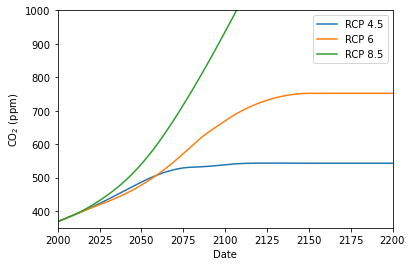

In [10]:
plt.plot(RCP45['YEAR'],RCP45['CO2'],label='RCP 4.5')
plt.plot(RCP6['YEAR'],RCP6['CO2'],label='RCP 6')
plt.plot(RCP85['YEAR'],RCP85['CO2'],label='RCP 8.5')
plt.xlim(2000,2200)
plt.ylim(350,1000)
plt.xlabel('Date')
plt.ylabel('CO$_2$ (ppm)')
plt.legend()
plt.show()

To compare your quadratic fit to these scenarios out to the future, you need to calculate the predicted values that come out of your regression for a wider range of years. To do this, create a numpy array of years

```
years = np.arange(1980,2200)
```

You can then pass this array to get model CO2 values:
```
model_CO2_values = np.polyval(*your poly 2 coefficients here*,years)
```

Then make a plot that adds the quadratic (2nd order polynomial) fit to the plot with the RCP scenarios:

### Compare predictions at 2100

Which of the emission scenarios leads to predicted CO$_2$ levels in 2100 that are closest to that of quadratic degree 2 polynomial fit?

*write your answer here*